# Mean Median Imputation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Sklearn Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# We can use Sklearn to create mean and median for the missing values, haven't used it this time.

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.sample(3)

,Age,Fare,Family,Survived
461,34.0,8.0500,0,0
524,NaN,7.2292,0,0
353,25.0,17.8000,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### Performing Train Test Split

In [6]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [9]:
round((x_train.isnull().mean()*100),2)

Age       20.79
Fare       5.06
Family     0.00
dtype: float64

### Calculate Mean and Median (Age | Fare)

In [10]:
mean_age= (x_train['Age'].mean()).round(2)
median_age = (x_train['Age'].median()).round(2)
mean_fare = (x_train['Fare'].mean()).round(2)
median_fare = (x_train['Fare'].median()).round(2)

In [11]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)

In [12]:
x_train.sample(3)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
43,3.0,41.5792,3,3.00,3.00,41.5792,41.5792
868,NaN,9.5000,0,29.79,28.75,9.5000,9.5000
624,21.0,16.1000,0,21.00,21.00,16.1000,16.1000


### Review Variance

In [13]:
print('Original Age Variable variance: ', x_train['Age'].var(),'\n'
      'Age Variance after median impute: ', x_train['Age_median'].var(), '\n'
      'Age Variance after mean impute: ', x_train['Age_mean'].var(), '\n'
     'Original Fare Variable variance: ', x_train['Fare'].var(), '\n'
     'Fare Variance after median impute: ', x_train['Fare_median'].var(), '\n'
     'Fare Variance after mean impute: ', x_train['Fare_mean'].var())

Original Age Variable variance:  204.34951339046142 
Age Variance after median impute:  161.98956633460548 
Age Variance after mean impute:  161.81262729321736 
Original Fare Variable variance:  2448.1979137063163 
Fare Variance after median impute:  2340.0880540209905 
Fare Variance after mean impute:  2324.2385259481703


### Changes in Distribution in Age

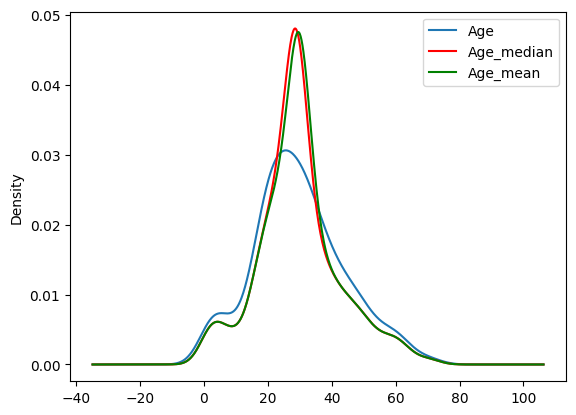

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
# x_train['Age'].plot.density( ax= ax, color = 'red') or the one below are same 
x_train['Age'].plot(kind= 'kde', ax = ax, legend = True)
x_train['Age_median'].plot(kind = 'kde', ax = ax, color = 'red', legend = True)
x_train['Age_mean'].plot(kind = 'kde', ax = ax, color = 'green', legend = True)

plt.show()

### Changes in Distribution in Fare

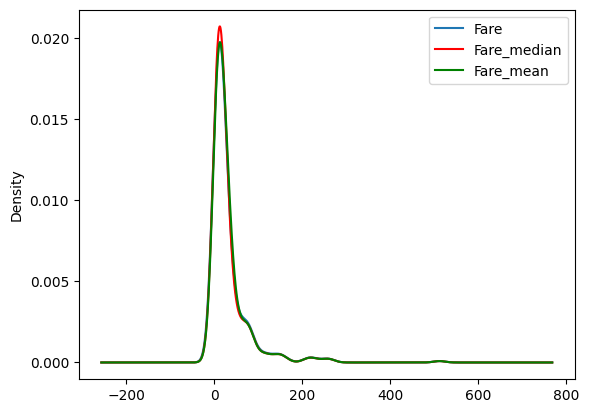

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind = 'kde', ax = ax, legend = True)
x_train['Fare_median'].plot(kind= 'kde', ax = ax, legend = True, color = 'red')
x_train['Fare_mean'].plot(kind= 'kde', ax = ax, legend = True, color = 'green')
plt.show()

### Check Covariance


In [16]:
x_train.cov().round(1)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.3,70.7,-6.5,204.3,204.3,66.7,64.9
Fare,70.7,2448.2,17.3,55.6,58.0,2448.2,2448.2
Family,-6.5,17.3,2.7,-5.1,-5.1,16.4,16.5
Age_mean,204.3,55.6,-5.1,161.8,161.8,52.8,51.3
Age_median,204.3,58.0,-5.1,161.8,162.0,55.0,53.6
Fare_mean,66.7,2448.2,16.4,52.8,55.0,2324.2,2324.2
Fare_median,64.9,2448.2,16.5,51.3,53.6,2324.2,2340.1


### Check Correlation

In [17]:
x_train.corr().round(2)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.00,0.09,-0.30,1.00,1.00,0.09,0.09
Fare,0.09,1.00,0.21,0.09,0.09,1.00,1.00
Family,-0.30,0.21,1.00,-0.24,-0.24,0.21,0.21
Age_mean,1.00,0.09,-0.24,1.00,1.00,0.09,0.08
Age_median,1.00,0.09,-0.24,1.00,1.00,0.09,0.09
Fare_mean,0.09,1.00,0.21,0.09,0.09,1.00,1.00
Fare_median,0.09,1.00,0.21,0.08,0.09,1.00,1.00


### Box Plot for Age

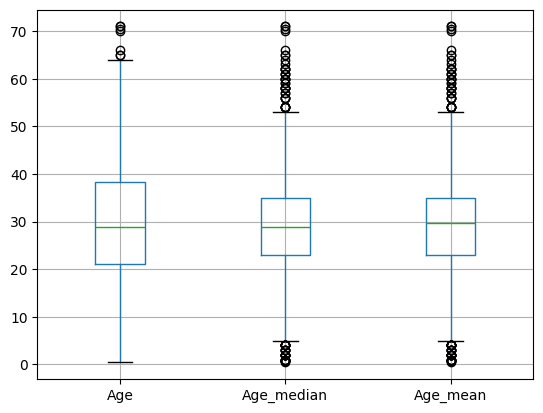

In [18]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()
plt.show()

### Box Plot for Fare

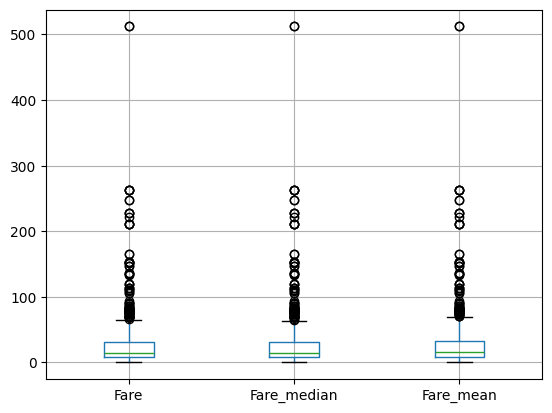

In [19]:
x_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()